<a href="https://colab.research.google.com/github/bsekiewicz/dw_competition/blob/master/notebook_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Competition
## 6th edition of the "Practical Machine Learning" course




### Cel:
Prognozowanie wartości zwrotu dla danego zamówienia. 


## Na czym polega konkurs?
Jest sklep online, który sprzedaje różne produkty dla ludzi z różnych krajów. Jedno zamówienie (faktura) może zawierać więcej niż jeden produkt. Trend, który jest dość popularny w szczególności w krajach zachodnich, to możliwość zwrotów i klienci chętnie z tego korzystają. Zwroty generują koszty i warto umieć przewidzieć to i jakoś z tym podziałać (pomijając skrajne przypadki takie jak "nie sprzedawać" klientowi X, bo to pewnie jest zakazane prawem). Natomiast pewnie dałoby się coś zrobić, jeśli wiedzielibyśmy, które zamówienia mogą być z dużym prawdopodobieństwem zwrócone.

**To zadanie można podzielić na 2 części**: z jednej strony jest to klasyfikacja, ponieważ ostatecznie trzeba stwierdzić, **czy ten produkt będzie zwrócony czy nie**. Z drugiej strony (i to jest docelowe zadanie) przez to, że zamówienie może zawierać więcej niż jeden produkt, to **ostatecznie chcemy obliczyć sumaryczny koszt zwrotów**. Możesz założyć, że jeśli w danym złożonym i opłaconym zamówieniu jest zwrot nawet jednego produktu, to zwracana jest całość zamówienia (czyli wszystkie produkty zawarte w tym zamówieniu). **Suma cen tych produktów daje całkowitą wartość zwrotu, właśnie to będziemy przewidydwać**.


### Metryką sukcesu
będzie **mean squared error**.

Dlaczego taka metryka? 
- Po pierwsze którąś trzeba wybrać :) 
- Po drugie, warto zrobić to w taki sposób, aby nie zajęło zbyt wiele czasu na zastanawianie się nad tym. Jeśli w trakcie konkursu uznasz, że któraś byłaby lepsza, to super. Oczywiście w ramach konkursu metryka zostanie jak wyżej, ale jak najbardziej przy okazji polecam zastanowić się, czy da się zrobić to lepiej.
- Po trzecie, [zasada Pareta](https://pl.wikipedia.org/wiki/Zasada_Pareta) naprawdę działa, czyli 20% wysiłku tworzy nam 80% wartości (i też można uznać, że działa to w drugą stronę). Nawet powiem więcej, warto to jeszcze podkręcić do kwadratu i koncentrować się na 4% wysiłku, aby uzyskać 64% wartości.

Zobacz na przykładzie. Sprawdziłem 4% najdroższych zwrotów i okazało się, że to 80% wartości do wszystkich zwrotów. Zobacz, jak rozkład wygląda na wykresie.
![](cumsum.png)

Dlatego w tym przypadku warto bardzo karać przypadki większe, `mean_square_error` robi to całkiem dobrze.


### Kaggle
Konkurs będzie dostępny na Kaggle - linku do konkursu szukaj w mailu. 


### Regulamin
1. Konkurs rozpoczyna się **31 marca 2020 r.** i kończy się w niedzielę, **12 kwietnia 2020 r. o 23:59** (UTC).
2. Zbiór danych został podzielony na dwie części: publiczny i prywatny. Publiczny zbiór danych zawiera cechy + odpowiedź, prywatny zbiór tylko cechy. Należy zrobić predykcję na prywatnym zbiorze i wysłać na Kaggle. Gdy skończy się konkurs, to ostateczny wynik będzie na zbiorze prywatnym.
3. Dane są przygotowane w celach edukacyjnych, zakazane jest ich używanie w innym celu niż ten kurs oraz zakazane jest upublicznianie danych w dowolny sposób. Rozwiązanie ma być oparte tylko i wyłącznie przy użyciu uczenia maszynowego (trenowanie modelu na podstawie udostępnionych danych). Nie ma co kombinować, skup się na nauce :).
4. W tym konkursie jako absolwenci możecie łączyć się w drużyny. Każdy uczestnik / drużyna może dodać rozwiązanie (czyli zrobić tak zwany *submit*) do 5 prób rozwiązań w jeden dzień (dlatego warto zacząć wcześniej, będzie więcej prób).
5. Wszyscy absolwenci biorący udział w konkursie opublikują wszystkim swoje najlepsze rozwiązanie i udostępnią je podając link na Slacku.


### Dane

W danych jest **1 067 371** wierszy, które zostały podzielone prawie na równe części:
- `train_online_retail` (520 142 wierszy)
- `test_online_retail` (547 229 wierszy)

Uwaga! Zwróć uwagę, że w wierszach jest pojedynczy produkt, a zamówienie może się składać z kilku produktów. Docelowo będziemy prognozować kwotę do zwrotu dla danego zamówienia. **Twoim zadaniem jest zrobić predykcję wartości zamówienia do zwrotu dla zbioru testowego**. 


Jak robisz `submit` na Kaggle, to jest wyliczany wynik. Zwróć uwagę, że wynik jest wyliczany tylko na 30% danych testowych i ten wynik jest widoczny na tak zwanym "Public Leader Board". 

W praktyce to oznacza, że w Twoim zbiorze treningowym są odpowiedzi, ale masz tak trenować model, aby móc go zwalidować najpierw lokalnie (czyli użyć np. walidację krzyżową lub coś bardziej zaawansowanego). Następnie wrzucasz swój wynik na Kaggle (jako plik csv). W ciągu dnia masz maksymalnie 5 prób (czym wcześniej zaczniesz robić konkurs, tym więcej będziesz mieć prób). W trakcie konkursu Twój wyliczony wynik jest sprawdzony tylko na części danych (w tym przypadku 30%). To jest tak zwany Public Leader Board.

![](../images/public_private.png)

Gdy konkurs się skończy, wynik będzie przeliczony na wszystkich dostępnych danych testowych i będzie dostępny na tak zwanym "Private Leader Board". Dlaczego tak się robi? Chodzi o to, że Twoje rozwiązanie powinno być jak najbardziej stabilne na jak najmniejszej jak i większej próbce danych. Dlatego musisz uważnie robić walidację, bo pierwsze miejsce na Public Leader Board nie musi być pierwszym na Private Leader Board :) Uważaj na to!

![](../images/30_70.png)


## Environment preparation.

In [0]:
# !pip install scikit-plot
# !pip install eli5
# !pip install --upgrade tables

In [219]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd '/content/drive/My Drive/Colab Notebooks/competition/data/'

/content/drive/My Drive/Colab Notebooks/competition/data


Libraries used:

In [5]:
import gc
import pandas as pd
import numpy as np
import string
import regex

from collections import defaultdict 

from sklearn.model_selection import cross_val_score, StratifiedKFold, GroupKFold, train_test_split
from sklearn.metrics import mean_squared_error as mse, precision_score, recall_score, make_scorer
from sklearn import utils

from scikitplot.metrics import plot_confusion_matrix, plot_calibration_curve
from scikitplot.estimators import plot_learning_curve, plot_feature_importances

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
import lightgbm as lgb

import eli5
from eli5.sklearn import PermutationImportance

from hyperopt import hp, fmin, tpe, STATUS_OK

import matplotlib.pyplot as plt
#%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [0]:
np.random.seed(0)

## Utilities

### Features engineering

In [0]:
# 
def get_feats(df, out=[]):
    feats = df.select_dtypes([np.number, np.bool]).columns
    black_list = ['is_test', 'is_canceled', 'is_canceled_pred', 'total_return', 'total_return_pred', 'weights']
    
    return [x for x in feats if x not in black_list + out]

# 
def group_by_key(df, group_key, agg_func, reversed=False):
    df_temp = df[~df['is_canceled'].isnull()].copy()
    if reversed:
        df_temp['is_canceled'] = df_temp['is_canceled'].map(lambda x: False if x else True)
    dict_ = df_temp.groupby(group_key)['is_canceled'].agg(agg_func).to_dict()
    if -1 in dict_: del dict_[-1]
    
    return df[group_key].map(lambda x: dict_.get(x, -1))

#
def group_by_key_alt(df, group_key, group_key_alt, agg_func, reversed=False):
    df_temp = df[~df['is_canceled'].isnull()].copy()
    if reversed:
        df_temp['is_canceled'] = df_temp['is_canceled'].map(lambda x: False if x else True)
    df_temp[group_key_alt] = df_temp[group_key_alt]*df_temp['is_canceled']
    dict_ = df_temp.groupby(group_key)[group_key_alt].agg(agg_func).to_dict()
    if -1 in dict_: del dict_[-1]
    
    return df[group_key].map(lambda x: dict_.get(x, -1))

#
def aggregate_by(df, group_key, agg_key, agg_name, agg_fun, filtered=False):
    if agg_name in df.columns:
        df = df.drop(agg_name, axis=1)
    if filtered:
        df_temp = df[~df['is_canceled'].isnull()].copy()
    else:
        df_temp = df.copy()
    return pd.merge(df, df_temp.groupby(group_key).agg(agg_name=(agg_key, agg_fun)), how='left', on=[group_key]).rename(columns = {'agg_name': agg_name})

# 
def prepare_categories(df, cats):
    for c in cats:
        df['cat_' + c] = df['description'].map(lambda x: c in str(x).lower())
    return df

### Model

In [0]:
### MODEL

# variable distribution
def dist(df, target='is_canceled', with_detailed=True): 
    df_temp = df[~df[target].isnull()]
    df_temp_agg = df_temp[['invoice', target]].drop_duplicates()
    df_temp_agg[target] = df_temp_agg[target].astype(np.int)

    detailed = df_temp[target].value_counts(normalize=True).values * 100
    orders = df_temp_agg[target].value_counts(normalize=True).values * 100

    if with_detailed:
        print('Distribution:\ndetailed: {} vs orders: {}'.format(detailed, orders))
    else:
        print('Distribution:\norders: {}'.format(orders))
    
    return None

#
def custom_error(df, strategy='proba', strategy_params={'threshold': 0.0001, 'agg_func': np.mean}, p=False):
    if strategy == 'proba':
        df_agg = pd.merge(df.groupby('invoice')[['price_total', 'is_canceled']].sum(), 
                          df.groupby('invoice')[['is_canceled_pred']].agg(strategy_params['agg_func']), 
                          how='left', on=['invoice']).reset_index()
        threshold = strategy_params['threshold']
    else:
        df_agg = df.groupby('invoice')[['price_total', 'is_canceled_pred', 'is_canceled']].sum().reset_index()
        threshold = 0

    df_agg['is_canceled']      = df_agg['is_canceled'] > 0
    df_agg['is_canceled_pred'] = df_agg['is_canceled_pred'] > threshold

    df_agg['total_return'] =      df_agg['price_total'] * df_agg['is_canceled']
    df_agg['total_return_pred'] = df_agg['price_total'] * df_agg['is_canceled_pred']

    mse_ = mse(df_agg['total_return'].values, df_agg['total_return_pred'].values)

    # reference scenario - dummy model
    df_agg['total_return_ref'] = 0
    mse_ref = mse(df_agg['total_return'].values, df_agg['total_return_ref'].values)

    if p:
        print('calc_custom_error summary:')
        print('target distribution')
        t = dist(df_agg, with_detailed=False)
        print('target_pred distribution')
        t = dist(df_agg, 'is_canceled_pred', with_detailed=False)    
        print('MSE vs MSE REF {} vs {} ({})'.format(mse_, mse_ref, min(mse_/mse_ref, 3)))

    return min(mse_/mse_ref, 3)

#
# def custom_score(y_true, y_pred, **kwargs):
#     df = kwargs['df'].loc[y_true.index, :]
#     strategy = kwargs.get('strategy', 'proba')
#     strategy_params = kwargs.get('strategy_params', {'threshold': 0.0001, 'agg_func': np.mean})

#     df['is_canceled_pred'] = y_pred
#     df['is_canceled_pred'] = df['is_canceled_pred']*df['invoice_weigths']

#     score = custom_error(df, strategy=strategy, strategy_params=strategy_params)

#     return 1-score

#
class CustomCV:
    def __init__(self, shuffle=True, n_splits=5, random_state=0, test_size=0.25):
        self.shuffle = shuffle
        self.n_splits = n_splits
        self.random_state = random_state
        self.test_size = test_size

    def split(self, df):
      # TODO: some weights to stabilize mse_ref between groups
      agg_invoices = df[['invoice', 'is_canceled']].groupby('invoice').agg(is_canceled = ('is_canceled', np.sum)).reset_index()
      agg_invoices.is_canceled = agg_invoices.is_canceled.map(lambda x: 10 if x>=10 else x)

      skf = StratifiedKFold(n_splits=self.n_splits, random_state=self.random_state, shuffle=self.shuffle)
      for invoices_for_train_idx, invoices_for_valid_idx in skf.split(agg_invoices[['invoice']], agg_invoices['is_canceled']):
          # train_temp + valid
          train_temp_invoices = list(agg_invoices.iloc[invoices_for_train_idx].invoice)
          valid_invoices      = list(agg_invoices.iloc[invoices_for_valid_idx].invoice)

          temp_train_idx, valid_idx = \
          df[df.invoice.isin(train_temp_invoices)].index, df[df.invoice.isin(valid_invoices)].index

          # train_temp = train + test
          train_invoices, test_invoices = \
              train_test_split(agg_invoices[agg_invoices.invoice.isin(train_temp_invoices)]['invoice'], test_size=self.test_size,
              random_state=self.random_state,
              stratify=agg_invoices[agg_invoices.invoice.isin(train_temp_invoices)]['is_canceled']) 

          train_idx, test_idx = \
          df[df.invoice.isin(train_invoices)].index, df[df.invoice.isin(test_invoices)].index

          yield train_idx, test_idx, valid_idx

#
class CustomCVForPlot:
    def __init__(self, groups, index, shuffle=True, n_splits=5, random_state=0):
        self.groups = groups
        self.index = index
        self.shuffle = shuffle
        self.n_splits = n_splits
        self.random_state = random_state

    def split(self, X, y, groups=None):
        if self.shuffle:
            X, y, self.groups, self.index = \
            utils.shuffle(X, y, self.groups, self.index, random_state=self.random_state)

        group_kfold = GroupKFold(n_splits=self.n_splits)

        for train_idx, test_idx in group_kfold.split(X, y, self.groups):    
            yield train_idx, test_idx 

    def get_index(self):
        return self.index

#
def update_fold(df, idx, y_pred, target='is_canceled_pred'):
    df.loc[idx, [target]] = y_pred

#
def run_cv(train_set, model_cls, model_params, feats,
           target='is_canceled', submit_set=None,
           n_splits=5, shuffle=True, random_state=2020, test_size=0.25,
           threshold=0.0001, agg_func=np.mean,
           is_plot_learning_curve=False, is_plot_confusion_matrix=False):

    df = train_set.copy()
    df = df.reset_index(drop=True)

    print('FEATURES:\n\n {} \n'.format(feats))
    
    pred_feature = '{}_pred'.format(target)
    df[pred_feature] = np.nan

    df = aggregate_by(df, 'invoice', 'price_total', 'invoice_weigths', np.sum)
    df['invoice_weigths'] = df['price_total']/df['invoice_weigths']

    if submit_set is not None:
        df_submit = submit_set.copy()

        if 'invoice_weigths' in df_submit.columns:
            df_submit = df_submit.drop('invoice_weigths', axis=1)
        df_submit = aggregate_by(df_submit, 'invoice', 'price_total', 'invoice_weigths', np.sum)
        df_submit['invoice_weigths'] = df_submit['price_total']/df_submit['invoice_weigths']
        df_submit[pred_feature] = 0

        w_total = 0
    else:
        df_submit = None

    print('CUSTOM CV\n')

    X = df[feats].values
    y = df[target].values

    ccv = CustomCV(shuffle=shuffle, n_splits=n_splits, 
                  random_state=random_state, test_size=test_size)
    for train_idx, test_idx, valid_idx in ccv.split(df):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        X_valid, y_valid = X[valid_idx], y[valid_idx]

        # print('FULL DATA')
        # t = dist(df[['invoice', target]])
        # print('TRAIN SET')
        # t = dist(df.loc[train_idx,:][['invoice', target]])
        # print('TEST SET')
        # t = dist(df.loc[test_idx,:][['invoice', target]])
        # print('VALID SET')
        # t = dist(df.loc[valid_idx,:][['invoice', target]])

        model = model_cls(**model_params)
        
        # CLASS WEIGHTS
        class_weights = list(utils.class_weight.\
                             compute_class_weight('balanced', 
                                                  np.unique(y_train),
                                                  y_train))

        w_array = np.ones(y_train.shape[0], dtype = 'float')
        for i, val in enumerate(y_train):
            w_array[i] = class_weights[val-1]

        eval_set = [(X_train, y_train), (X_test, y_test)]

        model.fit(X_train, y_train, 
                  sample_weight=w_array, 
                  eval_set=eval_set, 
                  eval_metric=["auc", "error", "logloss"], 
                  early_stopping_rounds=100,
                  verbose=0)

        y_pred = model.predict_proba(X_valid)[:, 1]*df.loc[valid_idx, :]['invoice_weigths'] # weighted by total price

        update_fold(df, valid_idx, y_pred)

        if submit_set is not None:
            w = custom_error(df.loc[valid_idx, :], strategy='proba', strategy_params={'threshold': threshold, 'agg_func': agg_func})
            w_total += 1/w

            y_pred_submit = model.predict_proba(df_submit[feats].values)[:, 1]*df_submit['invoice_weigths'] # weighted by total price
            df_submit[pred_feature] = df_submit[pred_feature] + y_pred_submit*1/w

    if submit_set is not None:
      df_submit[pred_feature] = df_submit[pred_feature]/w_total

      if target in df_submit.columns and (str(df_submit[target].iloc[0]).lower() != 'nan'):
          df_submit = pd.merge(df_submit.groupby('invoice')[['price_total', 'is_canceled']].sum(), 
                               df_submit.groupby('invoice')[[pred_feature]].agg(agg_func), 
                               how='left', on=['invoice']).reset_index()

          df_submit[target]         = df_submit[target] > 0
          df_submit['total_return'] = df_submit['price_total'] * df_submit[target]
      else:
          df_submit = df_submit.groupby('invoice')[['price_total', pred_feature]].agg(agg_func).reset_index()        

      df_submit[pred_feature] = df_submit[pred_feature] > threshold
      df_submit['total_return_pred'] = df_submit['price_total'] * df_submit[pred_feature] 

    print('mse: ', custom_error(df, strategy='proba', strategy_params={'threshold': threshold, 'agg_func': agg_func}, p=True))
            
    # TOODO: prepare my_estimator or scorer
    if is_plot_learning_curve:
        # custom_scorer = make_scorer(custom_score, needs_proba=True, df=df)

        title = 'Learning curve: {} {}'.format(model_cls.__name__, model_params)
        cv = CustomCVForPlot(df['invoice'], df.index)
        plot_learning_curve(model_cls(**model_params), df[feats], df[target], title=title, figsize=(15, 5), random_state=0, cv=cv, scoring='roc_auc')
        
    if is_plot_confusion_matrix:
        strategy = 'proba'
        strategy_params={'threshold': threshold, 'agg_func': agg_func}

        if strategy == 'proba':
            agg = pd.merge(df.groupby('invoice')[['price_total', 'is_canceled']].sum(), 
                           df.groupby('invoice')[['is_canceled_pred']].agg(strategy_params['agg_func']), 
                           how='left', on=['invoice']).reset_index()
            threshold = strategy_params['threshold']
        else:
            agg = df.groupby('invoice')[['price_total', 'is_canceled_pred', 'is_canceled']].sum().reset_index()
            threshold = 0

        agg['is_canceled']      = agg['is_canceled'] > 0
        agg['is_canceled_pred'] = agg['is_canceled_pred'] > threshold

        plot_confusion_matrix(agg['is_canceled'], agg['is_canceled_pred'])

    return custom_error(df, strategy='proba', strategy_params={'threshold': threshold, 'agg_func': agg_func}), df_submit
    
def plot_feature_importances(df, model_cls, model_params, feats, target='is_canceled'):
    print(feats)
    
    X = df[feats].values
    y = df[target].values

    model = model_cls(**model_params)

    class_weights = list(utils.class_weight.\
                          compute_class_weight('balanced', 
                                              np.unique(y),
                                              y))

    w_array = np.ones(y.shape[0], dtype = 'float')
    for i, val in enumerate(y):
        w_array[i] = class_weights[val-1]

    model.fit(X, y, sample_weight=w_array)

    perm = PermutationImportance(model, random_state=0).fit(X, y)
    return eli5.show_weights(perm, feature_names=feats, top=30)

# TODO: cleaning
def update_submit_set(df, dropped, path='submission.csv'):
    e = df.copy()
    e = e[['invoice', 'total_return_pred']].rename(columns={'total_return_pred': 'total_return'})

    tmp = dropped.copy()
    tmp = tmp[tmp.is_test]

    # Adjust bad debt => False
    tmp.loc[tmp.description == 'Adjust bad debt', 'is_canceled'] = False

    # '30479', '30477' => False
    tmp.loc[tmp.invoice.isin(['30479', '30477']), 'is_canceled'] = False

    # AMAZON FEE => True
    tmp.loc[tmp.description == 'AMAZON FEE', 'is_canceled'] = True

    # 0 valued
    tmp.loc[tmp.is_canceled.map(lambda x: str(x) == 'nan'), 'is_canceled'] = False

    tmp['is_canceled'] = tmp['is_canceled'].astype(np.int)

    tmp = tmp.groupby('invoice')[['price_total', 'is_canceled']].agg(np.sum).reset_index()  
    
    tmp['total_return'] = tmp['price_total'] * (tmp['is_canceled'] > 0)

    tmp = pd.concat([e, tmp[['invoice', 'total_return']]])

    tmp.to_csv(path, index=False)

    return tmp

In [0]:
# ### TEST FUNC
# train = pd.read_hdf('train_online_retail.h5').reset_index(drop=True)
# xgb_params = {'max_depth': 10, 'n_estimators': 300, 'learning_rate': 0.25, 'random_state': 0, 'tree_method': 'gpu_hist'}
# run_cv(train, xgb.XGBClassifier, xgb_params, get_feats(train), n_splits=5, threshold=0.0004, is_plot_learning_curve=True, is_plot_confusion_matrix=True)

## Data preparation

In [0]:
train = pd.read_hdf('train_online_retail.h5').reset_index(drop=True)
test  = pd.read_hdf('test_online_retail.h5').reset_index(drop=True)

df = pd.concat([train, test], sort=False)

del train, test

In [0]:
# repair price total
df['price_total'] = df['quantity'] * df['price_unit']

**Duplicates ?!**

In [12]:
df[df.invoice == 28480]

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test
264357,28480,4465,NEWSPAPER STAND,23,2010-12-07 16:43:00,9.890625,227.484375,3,United Kingdom,NaN,True
264358,28480,3892,MEMO BOARD RETROSPOT DESIGN,208,2010-12-07 16:43:00,3.859375,802.750000,3,United Kingdom,NaN,True
264359,28480,560,CREAM HEART CARD HOLDER,1008,2010-12-07 16:43:00,2.310547,2329.031250,3,United Kingdom,NaN,True
264360,28480,2667,BLACK HEART CARD HOLDER,1008,2010-12-07 16:43:00,2.310547,2329.031250,3,United Kingdom,NaN,True
264361,28480,1876,VINTAGE POST OFFICE CABINET,10,2010-12-07 16:43:00,52.781250,527.812500,3,United Kingdom,NaN,True
264362,28480,3362,VINTAGE UNION JACK MEMOBOARD,600,2010-12-07 16:43:00,6.378906,3827.343750,3,United Kingdom,NaN,True
264363,28480,778,CREAM SWEETHEART LETTER RACK,160,2010-12-07 16:43:00,3.880859,620.937500,3,United Kingdom,NaN,True
264364,28480,2499,WOOD BLACK BOARD ANT WHITE FINISH,600,2010-12-07 16:43:00,4.781250,2868.750000,3,United Kingdom,NaN,True
264365,28480,4566,HALL CABINET WITH 3 DRAWERS,72,2010-12-07 16:43:00,32.687500,2353.500000,3,United Kingdom,NaN,True
277035,28480,4465,NEWSPAPER STAND,23,2010-12-07 16:43:00,9.890625,227.484375,3,United Kingdom,NaN,True


In [0]:
df = df.drop_duplicates().reset_index(drop=True)

# NAPRAWIĆ duplikaty na test!



In [14]:
gc.collect()  # release memory

121

In [0]:
df_to_drop = pd.DataFrame()

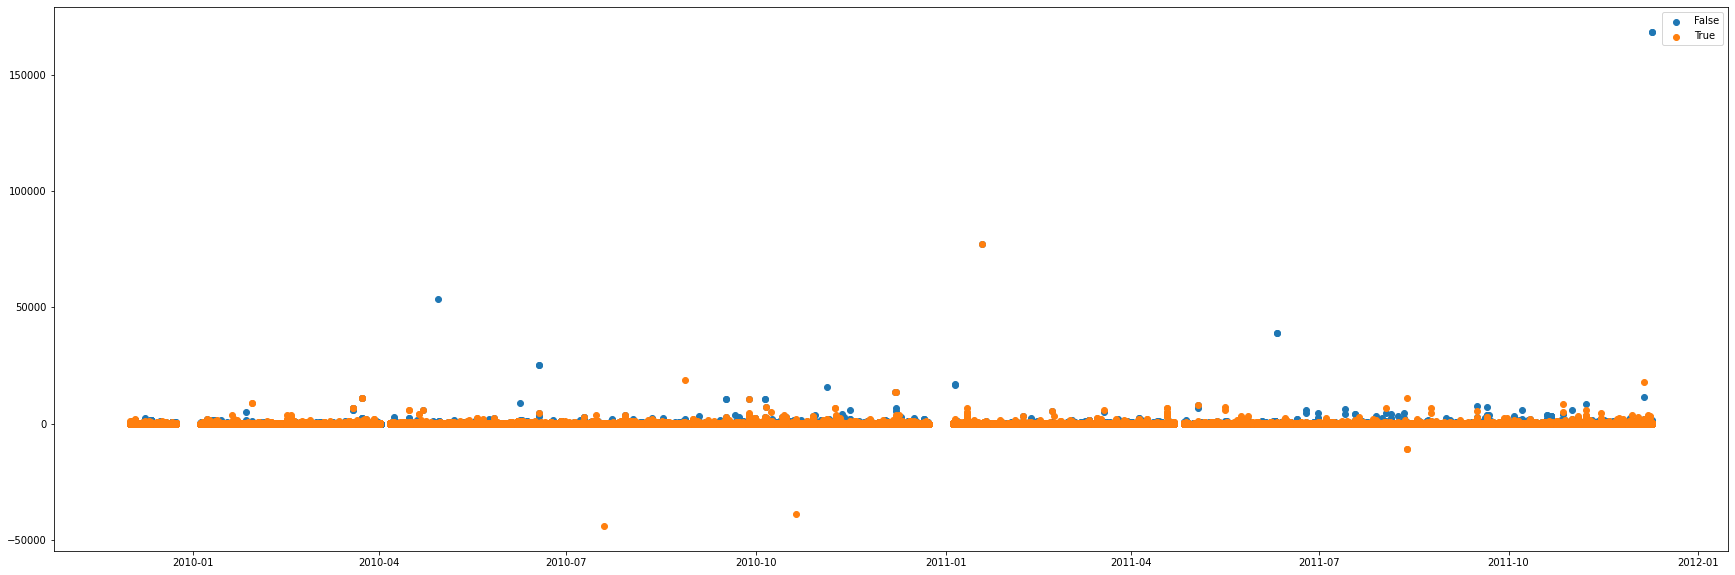

In [16]:
# quick overview of price total

plt.figure(figsize=(30,10))
for name, group in df.groupby("is_test"):
    plt.scatter(group["invoice_date"], group["price_total"], label=name)
plt.legend()
plt.show()

In [17]:
df[df.price_total < 0]

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test
641863,16004,4057,Adjust bad debt,1,2010-07-19 11:24:00,-44032.0,-44032.0,-1,United Kingdom,NaN,True
706167,23005,4057,Adjust bad debt,1,2010-10-20 12:04:00,-38912.0,-38912.0,-1,United Kingdom,NaN,True
911121,43158,4057,Adjust bad debt,1,2011-08-12 14:51:00,-11064.0,-11064.0,-1,United Kingdom,NaN,True
911122,43159,4057,Adjust bad debt,1,2011-08-12 14:52:00,-11064.0,-11064.0,-1,United Kingdom,NaN,True


In [18]:
df_to_drop = pd.concat([df_to_drop, df[df.invoice.isin(df[(df.description == 'Adjust bad debt')].invoice)]], ignore_index=True)
df[df.description == 'Adjust bad debt']  # OUT => set False

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test
89731,10049,4057,Adjust bad debt,1,2010-04-29 13:36:00,53600.0,53600.0,-1,United Kingdom,False,False
641863,16004,4057,Adjust bad debt,1,2010-07-19 11:24:00,-44032.0,-44032.0,-1,United Kingdom,NaN,True
706167,23005,4057,Adjust bad debt,1,2010-10-20 12:04:00,-38912.0,-38912.0,-1,United Kingdom,NaN,True
911120,43157,4057,Adjust bad debt,1,2011-08-12 14:50:00,11064.0,11064.0,-1,United Kingdom,NaN,True
911121,43158,4057,Adjust bad debt,1,2011-08-12 14:51:00,-11064.0,-11064.0,-1,United Kingdom,NaN,True
911122,43159,4057,Adjust bad debt,1,2011-08-12 14:52:00,-11064.0,-11064.0,-1,United Kingdom,NaN,True


In [19]:
df[df.price_total > 10000]

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test
68125,7609,1232,Manual,1,2010-03-23 15:20:00,10952.000000,10952.000000,2100,United Kingdom,True,False
68126,7611,1232,Manual,1,2010-03-23 15:24:00,10952.000000,10952.000000,2100,United Kingdom,True,False
89731,10049,4057,Adjust bad debt,1,2010-04-29 13:36:00,53600.000000,53600.000000,-1,United Kingdom,False,False
120439,14000,1232,Manual,1,2010-06-17 16:52:00,25104.000000,25104.000000,2959,United Kingdom,True,False
120440,14002,1232,Manual,1,2010-06-17 16:53:00,25104.000000,25104.000000,-1,United Kingdom,False,False
167307,19775,1232,Manual,1,2010-09-16 14:53:00,10472.000000,10472.000000,580,United Kingdom,True,False
167309,19778,1232,Manual,1,2010-09-16 15:12:00,10472.000000,10472.000000,-1,United Kingdom,False,False
175405,20640,1232,Manual,1,2010-09-27 16:12:00,10472.000000,10472.000000,580,United Kingdom,False,False
182549,21421,1232,Manual,1,2010-10-05 11:47:00,10472.000000,10472.000000,580,United Kingdom,True,False
182550,21422,1232,Manual,1,2010-10-05 11:49:00,10472.000000,10472.000000,-1,United Kingdom,False,False


In [0]:
# df_to_drop = pd.concat([df_to_drop, df[df.invoice.isin(['14000', '14000'])]], ignore_index=True)
# df[df.invoice.isin(['14000', '14002'])]

In [21]:
df_to_drop = pd.concat([df_to_drop, df[df.invoice.isin(['30479', '30477'])]], ignore_index=True)
df[df.invoice.isin(['30479', '30477'])]  # OUT => set False

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test
272422,30479,4647,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.040039,77186.499023,836,United Kingdom,True,False
789433,30477,4647,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.040039,77186.499023,836,United Kingdom,NaN,True


In [22]:
df_to_drop = pd.concat([df_to_drop, df[df.invoice.isin(['53587', '53588'])]], ignore_index=True)
df[df.invoice.isin(['53587', '53588'])]  # OUT

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test
503269,53587,5304,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.080078,168475.927734,3689,United Kingdom,False,False
503270,53588,5304,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:27:00,2.080078,168475.927734,3689,United Kingdom,True,False


In [23]:
df_to_drop = pd.concat([df_to_drop, df[df.invoice.isin(['39258', '39260'])]], ignore_index=True)
df[df.invoice.isin(['39258', '39260'])]  # OUT

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test
350593,39258,4134,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.5,38970.0,5040,United Kingdom,False,False
350594,39260,1232,Manual,1,2011-06-10 15:31:00,38976.0,38976.0,5040,United Kingdom,True,False


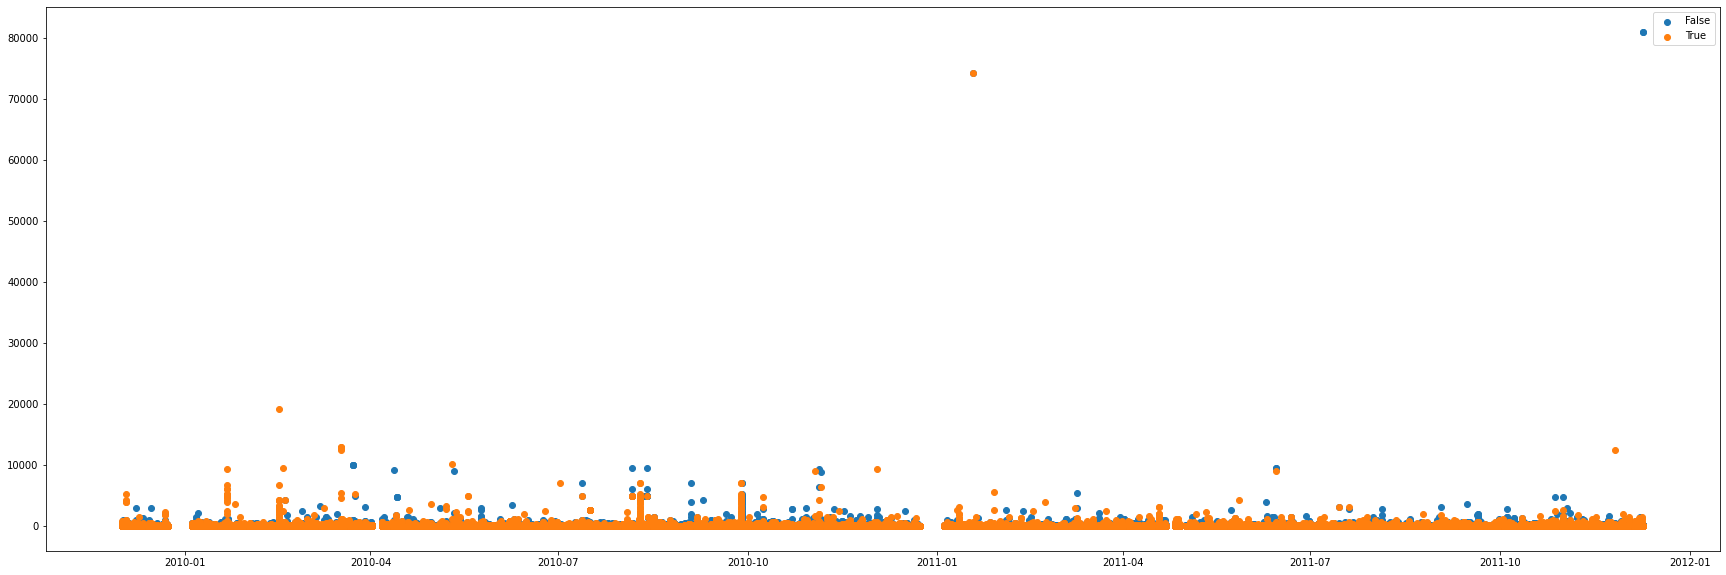

In [24]:
# quick overview of quantity

plt.figure(figsize=(30,10))
for name, group in df.groupby("is_test"):
    plt.scatter(group["invoice_date"], group["quantity"], label=name)
plt.legend()
plt.show()

In [25]:
df[df.quantity > 10000] # look at price total

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test
272422,30479,4647,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.040039,77186.499023,836,United Kingdom,True,False
503269,53587,5304,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.080078,168475.927734,3689,United Kingdom,False,False
503270,53588,5304,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:27:00,2.080078,168475.927734,3689,United Kingdom,True,False
548121,4996,594,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.099976,1914.732422,606,Denmark,NaN,True
566160,7161,125,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.099976,1295.683594,606,Denmark,NaN,True
566161,7161,2059,SET/6 STRAWBERRY PAPER PLATES,12480,2010-03-17 13:09:00,0.099976,1247.695312,606,Denmark,NaN,True
566162,7161,129,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.099976,1295.683594,606,Denmark,NaN,True
566163,7161,126,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.099976,1274.088867,606,Denmark,NaN,True
598609,10823,2482,FLAG OF ST GEORGE CAR FLAG,10200,2010-05-10 14:55:00,0.000000,0.000000,-1,United Kingdom,NaN,True
789433,30477,4647,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.040039,77186.499023,836,United Kingdom,NaN,True


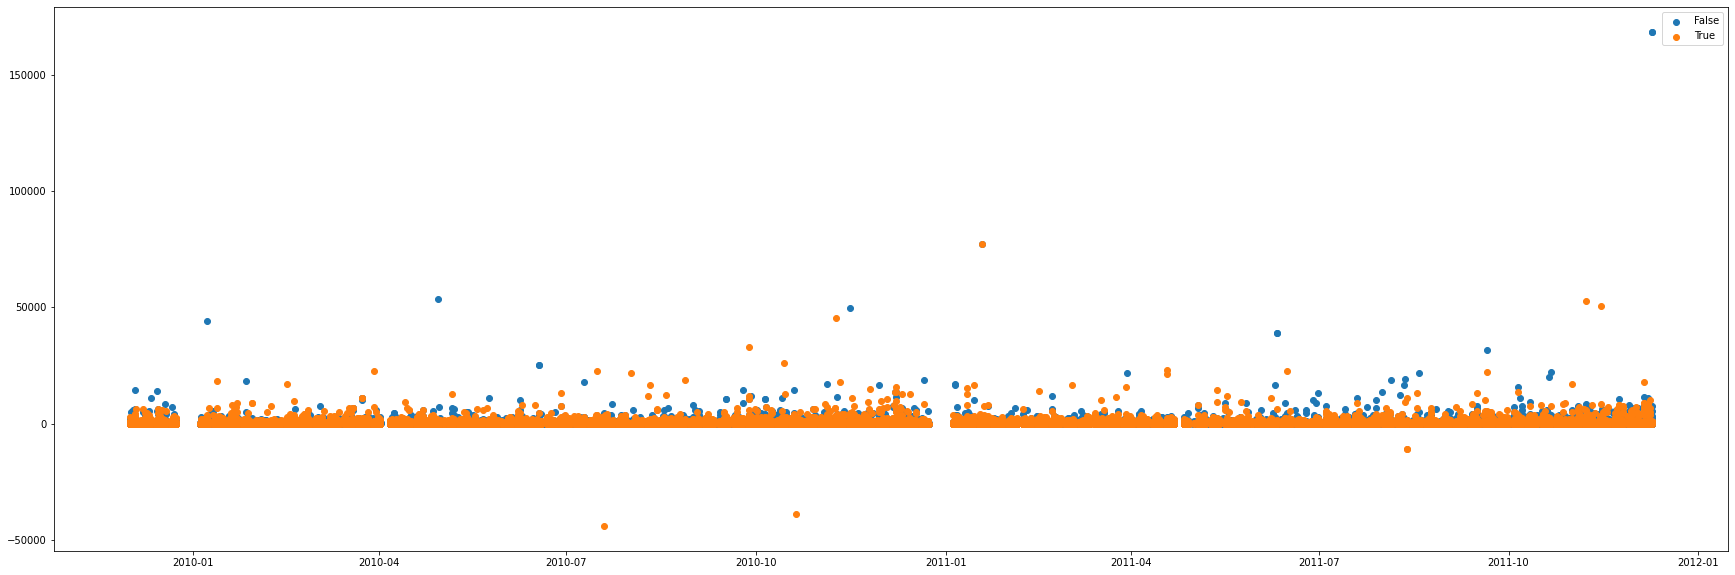

In [26]:
# quick overview of invoice price total

tmp = df.copy() 
tmp = aggregate_by(df, 'invoice', 'price_total', 'invoice_price_total', np.sum)
tmp = tmp[['invoice', 'invoice_date', 'is_test', 'invoice_price_total']].drop_duplicates(['invoice', 'is_test', 'invoice_price_total'])

plt.figure(figsize=(30,10))
for name, group in tmp.groupby("is_test"):
    plt.scatter(group["invoice_date"], group["invoice_price_total"], label=name)
plt.legend()
plt.show()

In [27]:
tmp[tmp.invoice_price_total < 0]

,invoice,invoice_date,is_test,invoice_price_total
641863,16004,2010-07-19 11:24:00,True,-44032.0
706167,23005,2010-10-20 12:04:00,True,-38912.0
911121,43158,2011-08-12 14:51:00,True,-11064.0
911122,43159,2011-08-12 14:52:00,True,-11064.0


In [28]:
tmp[tmp.invoice_price_total > 30000]

,invoice,invoice_date,is_test,invoice_price_total
24441,2488,2010-01-07 12:34:00,False,44053.907227
89731,10049,2010-04-29 13:36:00,False,53600.000000
225253,25892,2010-11-15 16:02:00,False,49840.712891
272422,30479,2011-01-18 10:17:00,False,77186.499023
350593,39258,2011-06-10 15:28:00,False,38970.000000
350594,39260,2011-06-10 15:31:00,False,38976.000000
410109,45511,2011-09-20 11:05:00,False,31695.267578
503269,53587,2011-12-09 09:15:00,False,168475.927734
503270,53588,2011-12-09 09:27:00,False,168475.927734
683605,20662,2010-09-27 16:59:00,True,33164.734375


In [29]:
df[df.invoice.isin(['2488', '25892', '25072', '49856', '50671', '45511', '20662'])] # IT'S OK

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test
24441,2488,51,VINTAGE SNAKES & LADDERS,216,2010-01-07 12:34:00,3.390625,732.375000,49,EIRE,False,False
24442,2488,2591,LARGE RED SPOT WINDMILL,288,2010-01-07 12:34:00,1.849609,532.687500,49,EIRE,False,False
24443,2488,1665,SET OF 36 PAISLEY FLOWER DOILIES,288,2010-01-07 12:34:00,1.250000,360.000000,49,EIRE,False,False
24444,2488,1180,HOME SWEET HOME MUG,288,2010-01-07 12:34:00,1.059570,305.156250,49,EIRE,False,False
24445,2488,1029,SMALL RED SPOT WINDMILL,192,2010-01-07 12:34:00,1.059570,203.437500,49,EIRE,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995663,50671,47,PINK BLUE FELT CRAFT TRINKET BOX,246,2011-11-14 17:55:00,2.949219,725.507812,-1,United Kingdom,NaN,True
995664,50671,2226,HANGING HEART JAR T-LIGHT HOLDER,246,2011-11-14 17:55:00,2.949219,725.507812,-1,United Kingdom,NaN,True
995665,50671,158,ANTIQUE SILVER T-LIGHT GLASS,130,2011-11-14 17:55:00,2.949219,383.398438,-1,United Kingdom,NaN,True
995666,50671,435,ZINC WILLIE WINKIE CANDLE STICK,94,2011-11-14 17:55:00,1.950195,183.318359,-1,United Kingdom,NaN,True


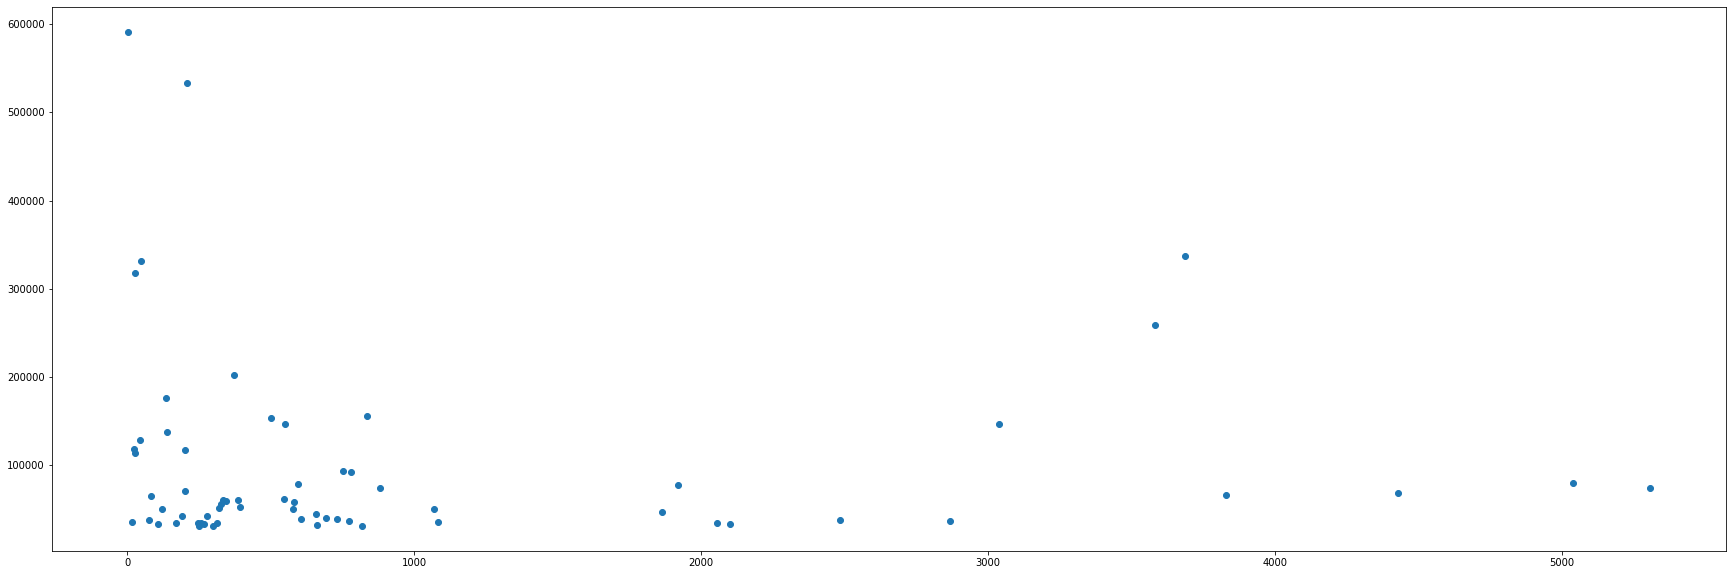

In [30]:
# quick overview of customer price total

tmp = df.copy() 
tmp = aggregate_by(df, 'customer_id', 'price_total', 'customer_price_total', np.sum)
tmp = tmp[tmp.customer_id != -1]
tmp = tmp[['customer_id', 'customer_price_total']].drop_duplicates()
tmp = tmp[tmp.customer_price_total > 30000]

plt.figure(figsize=(30,10))
plt.scatter(tmp["customer_id"], tmp["customer_price_total"])
plt.show()

In [0]:
# tmp.sort_values('customer_price_total', ascending=False)

In [0]:
tmp2 = df.copy() 
tmp2.is_canceled = tmp2.is_canceled.map(lambda x: str(x))
tmp2 = pd.merge(tmp2, tmp2.groupby(['customer_id', 'is_canceled']).agg(agg_name=('price_total', np.sum)).reset_index(), how='left', on=['customer_id', 'is_canceled']).rename(columns = {'agg_name': 'customer_price_total'})
tmp2 = tmp2[tmp2.customer_id.isin(list(tmp.sort_values('customer_price_total', ascending=False).customer_id))][['invoice', 'customer_id', 'is_canceled', 'customer_price_total']].drop_duplicates()

In [33]:
tmp2[tmp2.customer_id > 2000]

,invoice,customer_id,is_canceled,customer_price_total
65732,7311,2056,False,6960.000000
65816,7314,2056,True,12756.000000
65817,7316,2056,True,12756.000000
68125,7609,2100,True,21904.000000
68126,7611,2100,True,21904.000000
...,...,...,...,...
1016140,52294,3582,nan,167840.503906
1016142,52295,3582,nan,167840.503906
1017700,52429,3829,nan,34279.691406
1025006,53140,5307,nan,42617.137695


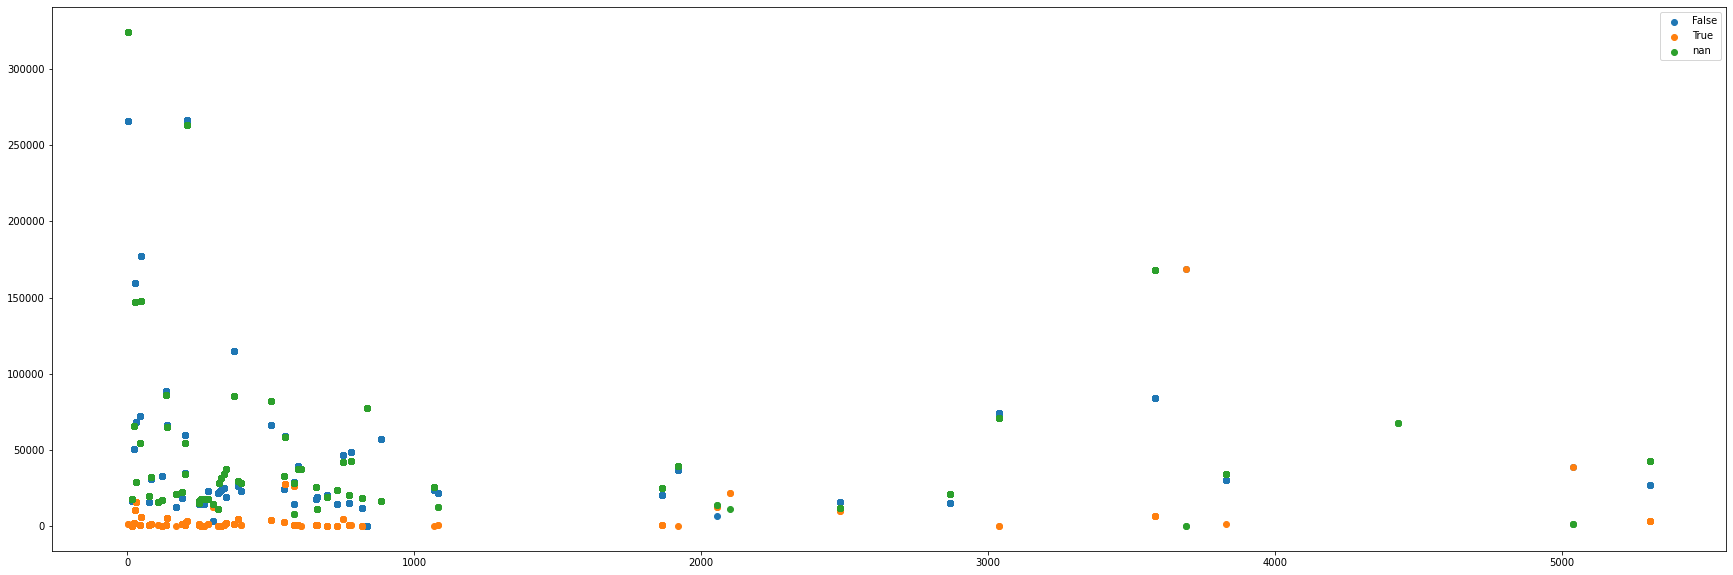

In [34]:
plt.figure(figsize=(30,10))
for name, group in tmp2.groupby("is_canceled"):
    plt.scatter(group["customer_id"], group["customer_price_total"], label=name)
plt.legend()
plt.show()

In [35]:
df[df.customer_id == 5040] # excluded earlier

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test
350593,39258,4134,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.500000,38970.000000,5040,United Kingdom,False,False
350594,39260,1232,Manual,1,2011-06-10 15:31:00,38976.000000,38976.000000,5040,United Kingdom,True,False
871066,39257,4134,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.949219,296.953125,5040,United Kingdom,NaN,True
871076,39261,4134,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.500000,649.500000,5040,United Kingdom,NaN,True
871086,39263,4134,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:39:00,4.949219,296.953125,5040,United Kingdom,NaN,True


In [36]:
df[df.customer_id == 3689] # excluded earlier

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test
503269,53587,5304,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.080078,168475.927734,3689,United Kingdom,False,False
503270,53588,5304,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:27:00,2.080078,168475.927734,3689,United Kingdom,True,False
689792,21370,2821,This is a test product.,2,2010-10-04 16:38:00,4.500000,9.000000,3689,United Kingdom,NaN,True
856320,37590,4659,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.650391,1.650391,3689,United Kingdom,NaN,True
856321,37590,4682,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.250000,1.250000,3689,United Kingdom,NaN,True


In [0]:
### TEST TEST TEST - REMOVE 0 INOVICE PRICE TOTAL

In [0]:
tmp = df.copy() 
tmp = aggregate_by(df, 'invoice', 'price_total', 'invoice_price_total', np.sum)
df_to_drop = pd.concat([df_to_drop, df[df.invoice.isin(tmp[tmp.invoice_price_total <= 0].invoice.unique())]], ignore_index=True)

In [0]:
### AMAZON FEE set to True

In [0]:
df_to_drop = pd.concat([df_to_drop, df[df.invoice.isin(tmp[tmp.description == 'AMAZON FEE'].invoice.unique())]], ignore_index=True)

REMOVE OUTLIERS

In [41]:
df_to_drop

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test
0,10049,4057,Adjust bad debt,1,2010-04-29 13:36:00,53600.0,53600.0,-1,United Kingdom,False,False
1,16004,4057,Adjust bad debt,1,2010-07-19 11:24:00,-44032.0,-44032.0,-1,United Kingdom,NaN,True
2,23005,4057,Adjust bad debt,1,2010-10-20 12:04:00,-38912.0,-38912.0,-1,United Kingdom,NaN,True
3,43157,4057,Adjust bad debt,1,2011-08-12 14:50:00,11064.0,11064.0,-1,United Kingdom,NaN,True
4,43158,4057,Adjust bad debt,1,2011-08-12 14:51:00,-11064.0,-11064.0,-1,United Kingdom,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...
5362,43813,4574,AMAZON FEE,1,2011-08-24 14:50:00,4528.0,4528.0,-1,United Kingdom,NaN,True
5363,43815,4574,AMAZON FEE,1,2011-08-24 14:53:00,6664.0,6664.0,-1,United Kingdom,NaN,True
5364,45217,4574,AMAZON FEE,1,2011-09-15 13:50:00,5524.0,5524.0,-1,United Kingdom,NaN,True
5365,49821,4574,AMAZON FEE,1,2011-11-07 15:03:00,5876.0,5876.0,-1,United Kingdom,NaN,True


In [0]:
df = df[~df.invoice.isin(df_to_drop.invoice)]

In [43]:
gc.collect()  # release memory

13233

**EDA - DESCRIPTION**

In [0]:
to_check = df[df.description.map(lambda x: regex.sub('[^a-zA-Z]*', '', str(x).upper()) != regex.sub('[^a-zA-Z]*', '', str(x)))].description.map(lambda x: regex.sub('[^a-zA-Z ]*', '', str(x).lower()).strip()).unique()

In [45]:
sorted(to_check)

['adjustment by john on',
 'adjustment by peter on',
 'adjustment by peter on jun',
 'bag g swirly marbles',
 'bank charges',
 'boombox ipod classic',
 'chrome euro hook cm',
 'cruk commission',
 'dads cab electronic meter',
 'discount',
 'dotcomgiftshop gift voucher',
 'dr jams arouzer stress ball',
 'electronic talking breathaloser',
 'essential balm g tin in envelope',
 'flowers handbag blue and orange',
 'folk art greeting cardpack',
 'french blue metal door sign no',
 'glow in the dark shot glasses',
 'high resolution image',
 'hypochondriac pill stress ball',
 'manual',
 'next day carriage',
 'number tile cottage garden no',
 'number tile vintage font no',
 'polyester filler pad cmxcm',
 'polyester filler pad xcm',
 'set of  soldier skittles',
 'the king gift bag xxcm',
 'this is a test product',
 'traditional biscuit cutters  set',
 'usb office glitter lamp',
 'usb office mirror ball']

In [0]:
# df[df.description.map(lambda x: 'adjust' in str(x).lower())].sort_values('invoice_date', ascending=True).head(50)

In [0]:
# df[df.description.map(lambda x: 'bank charges' in str(x).lower())].sort_values('invoice_date', ascending=True).head(50)

In [48]:
df[df.description.map(lambda x: 'commission' in str(x).lower())].sort_values('invoice_date', ascending=True).head(50)

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test
920132,44036,5033,CRUK Commission,1,2011-08-30 10:49:00,1.599609,1.599609,5307,United Kingdom,NaN,True
398880,44359,5033,CRUK Commission,1,2011-09-02 15:45:00,13.007812,13.007812,5307,United Kingdom,True,False
928808,44805,5033,CRUK Commission,1,2011-09-09 15:17:00,15.960938,15.960938,5307,United Kingdom,NaN,True
405817,45025,5033,CRUK Commission,1,2011-09-13 12:32:00,52.250000,52.250000,5307,United Kingdom,True,False
411227,45633,5033,CRUK Commission,1,2011-09-21 14:40:00,608.500000,608.500000,5307,United Kingdom,True,False
942880,46061,5033,CRUK Commission,1,2011-09-26 15:28:00,447.500000,447.500000,5307,United Kingdom,NaN,True
423185,46557,5033,CRUK Commission,1,2011-10-03 09:57:00,361.500000,361.500000,5307,United Kingdom,True,False
956148,47351,5033,CRUK Commission,1,2011-10-10 17:12:00,412.000000,412.000000,5307,United Kingdom,NaN,True
962590,47868,5033,CRUK Commission,1,2011-10-17 13:31:00,496.000000,496.000000,5307,United Kingdom,NaN,True
443667,48481,5033,CRUK Commission,1,2011-10-24 17:07:00,425.250000,425.250000,5307,United Kingdom,True,False


In [0]:
# df[df.description.map(lambda x: 'discount' in str(x).lower())].sort_values('invoice_date', ascending=True).head(50)

In [0]:
# df[df.description.map(lambda x: 'manual' in str(x).lower())].sort_values('invoice_date', ascending=True).head(50)

In [51]:
df[df.description.map(lambda x: 'test ' in str(x).lower())].sort_values('invoice_date', ascending=True).head(50)

,invoice,stock_code,description,quantity,invoice_date,price_unit,price_total,customer_id,country,is_canceled,is_test
14377,1406,2821,This is a test product.,10,2009-12-14 08:34:00,4.5,45.0,836,United Kingdom,False,False
14575,1423,2821,This is a test product.,5,2009-12-14 11:00:00,4.5,22.5,836,United Kingdom,False,False
517791,1425,2821,This is a test product.,5,2009-12-14 11:02:00,4.5,22.5,836,United Kingdom,NaN,True
522755,1929,2821,This is a test product.,5,2009-12-18 10:47:00,4.5,22.5,836,United Kingdom,NaN,True
20635,1933,3001,This is a test product.,1,2009-12-18 10:55:00,1.0,1.0,836,United Kingdom,False,False
23455,2330,2821,This is a test product.,5,2010-01-04 09:24:00,4.5,22.5,836,United Kingdom,False,False
23456,2332,2821,This is a test product.,5,2010-01-04 09:53:00,4.5,22.5,836,United Kingdom,False,False
531001,2873,2821,This is a test product.,5,2010-01-14 13:50:00,4.5,22.5,836,United Kingdom,NaN,True
33577,3315,2821,This is a test product.,5,2010-01-22 13:30:00,4.5,22.5,836,United Kingdom,False,False
78316,8771,2821,This is a test product.,5,2010-04-12 09:52:00,4.5,22.5,1468,United Kingdom,False,False


In [0]:
# TODO: deep analysis of invoices with: AMAZON FEE, manual 

## FEATURES ENGINEERING

In [0]:
feats_out = []

DESCRIPTION

In [0]:
# repair stock code
df['description_cleaned'] = df.description
df['description_cleaned'] = df.description_cleaned.map(lambda x: regex.sub('[^a-zA-Z ]*', '', str(x).lower()).strip())
df['description_cleaned'] = df.description_cleaned.map(lambda x: regex.sub('[ ]+', ' ', x).strip())
df['description_cleaned'] = df.description_cleaned.map(lambda x: 'adjustment' if 'adjustment' in x else x)

In [55]:
print('{} vs {}'.format(len(df['description'].unique()), len(df['description_cleaned'].unique())))

5413 vs 5225


In [0]:
tmp = df[['stock_code', 'description_cleaned']].drop_duplicates('stock_code')
tmp.index = tmp.stock_code
tmp = tmp.drop('stock_code', axis=1)
dict_ = tmp.to_dict()['description_cleaned']
df['description_cleaned'] = df.stock_code.map(lambda x: dict_[x])

In [0]:
df['stock_code_new'] = df['description_cleaned'].factorize()[0]

In [58]:
print('{} vs {}'.format(len(df['stock_code'].unique()), len(df['stock_code_new'].unique())))

4930 vs 4663


In [0]:
# ???!!!

df['description_len'] = df['description'].map(lambda x: len(x))
df['description_cnt_whitespace'] = df['description'].map(lambda x: x.count(' '))

DATE

In [0]:
df['invoice_date_y'] = df.invoice_date.dt.year
df['invoice_date_m'] = df.invoice_date.dt.month
df['invoice_date_d'] = df.invoice_date.dt.day
df['invoice_date_h'] = df.invoice_date.dt.hour
df['invoice_date_min'] = df.invoice_date.dt.minute
df['invoice_date_dow'] = df.invoice_date.dt.dayofweek

In [0]:
# TODO: last day of month, holidays

COUNTRY

In [0]:
df['country_cat'] = df['country'].factorize()[0]

CUSTOMER ORDERS

In [0]:
df['cnt_customer_cancel'] = group_by_key(df, 'customer_id', np.sum).astype(np.int)
df['cnt_customer_not_cancel'] = group_by_key(df, 'customer_id', np.sum, reversed=True).astype(np.int)
df['cnt_customer_orders'] = group_by_key(df, 'customer_id', np.size).astype(np.int)
df['cnt_customer_cancel_perc'] = df['cnt_customer_cancel']/df['cnt_customer_orders']

df['cnt_customer_cancel_log'] = df.cnt_customer_cancel.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['cnt_customer_not_cancel_log'] = df.cnt_customer_not_cancel.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['cnt_customer_orders_log'] = df.cnt_customer_orders.map(lambda x: 0 if x <= 0 else np.log1p(x))

feats_out += ['cnt_customer_cancel', 'cnt_customer_not_cancel', 'cnt_customer_orders'] # + ['cnt_customer_orders_log']

PRODUCTS ORDERS

In [0]:
# df['cnt_product_cancel'] = group_by_key(df, 'stock_code', np.sum).astype(np.int)
# df['cnt_product_not_cancel'] = group_by_key(df, 'stock_code', np.sum, reversed=True).astype(np.int)
# df['cnt_product_orders'] = group_by_key(df, 'stock_code', np.size).astype(np.int)
# df['cnt_product_cancel_perc'] = df['cnt_product_cancel']/df['cnt_product_orders']

# df['cnt_product_cancel_log'] = df.cnt_product_cancel.map(lambda x: 0 if x <= 0 else np.log1p(x))
# df['cnt_product_orders_log'] = df.cnt_product_orders.map(lambda x: 0 if x <= 0 else np.log1p(x))
# df['cnt_product_not_cancel_log'] = df.cnt_product_not_cancel.map(lambda x: 0 if x <= 0 else np.log1p(x))

# df['cnt_product_stock_cancel'] = group_by_key_alt(df, 'stock_code', 'quantity', np.sum).astype(np.int)
# df['cnt_product_stock_not_cancel'] = group_by_key_alt(df, 'stock_code', 'quantity', np.sum, reversed=True).astype(np.int)
# df['cnt_product_stock_cancel_perc'] = df['cnt_product_stock_cancel']/(df['cnt_product_stock_cancel'] + df['cnt_product_stock_not_cancel'])

# df['cnt_product_stock_cancel_log'] = df.cnt_product_stock_cancel.map(lambda x: 0 if x <= 0 else np.log1p(x))
# df['cnt_product_stock_not_cancel_log'] = df.cnt_product_stock_not_cancel.map(lambda x: 0 if x <= 0 else np.log1p(x))

In [0]:
df['cnt_product_new_cancel'] = group_by_key(df, 'stock_code_new', np.sum).astype(np.int)
df['cnt_product_new_not_cancel'] = group_by_key(df, 'stock_code_new', np.sum, reversed=True).astype(np.int)
df['cnt_product_new_orders'] = group_by_key(df, 'stock_code_new', np.size).astype(np.int)
df['cnt_product_new_cancel_perc'] = df['cnt_product_new_cancel']/df['cnt_product_new_orders']

df['cnt_product_new_cancel_log'] = df.cnt_product_new_cancel.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['cnt_product_new_orders_log'] = df.cnt_product_new_orders.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['cnt_product_new_not_cancel_log'] = df.cnt_product_new_not_cancel.map(lambda x: 0 if x <= 0 else np.log1p(x))

df['cnt_product_new_stock_cancel'] = group_by_key_alt(df, 'stock_code_new', 'quantity', np.sum).astype(np.int)
df['cnt_product_new_stock_not_cancel'] = group_by_key_alt(df, 'stock_code_new', 'quantity', np.sum, reversed=True).astype(np.int)
df['cnt_product_new_stock_cancel_perc'] = df['cnt_product_new_stock_cancel']/(df['cnt_product_new_stock_cancel'] + df['cnt_product_new_stock_not_cancel'])

df['cnt_product_new_stock_cancel_log'] = df.cnt_product_new_stock_cancel.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['cnt_product_new_stock_not_cancel_log'] = df.cnt_product_new_stock_not_cancel.map(lambda x: 0 if x <= 0 else np.log1p(x))

feats_out += ['cnt_product_new_cancel', 'cnt_product_new_not_cancel', 'cnt_product_new_orders', 'cnt_product_new_stock_cancel', 'cnt_product_new_stock_not_cancel']  # + ['cnt_product_new_orders_log']

AGGREGATIONS

In [0]:
df = aggregate_by(df, 'invoice', 'price_unit', 'price_unit_min', agg_fun=np.min)
df = aggregate_by(df, 'invoice', 'price_unit', 'price_unit_max', agg_fun=np.max)
df = aggregate_by(df, 'invoice', 'price_unit', 'price_unit_mean', agg_fun=np.mean)
df = aggregate_by(df, 'invoice', 'price_unit', 'price_unit_median', agg_fun=np.median)
df = aggregate_by(df, 'invoice', 'price_unit', 'price_unit_sum', agg_fun=np.sum)

df['price_unit_log'] = df.price_unit.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_unit_min_log'] = df.price_unit_min.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_unit_max_log'] = df.price_unit_max.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_unit_mean_log'] = df.price_unit_mean.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_unit_median_log'] = df.price_unit_median.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_unit_sum_log'] = df.price_unit_sum.map(lambda x: 0 if x <= 0 else np.log1p(x))

feats_out += ['price_unit', 'price_unit_min', 'price_unit_max', 'price_unit_mean', 'price_unit_median', 'price_unit_sum']

In [0]:
df = aggregate_by(df, 'invoice', 'quantity', 'quantity_min', agg_fun=np.min)
df = aggregate_by(df, 'invoice', 'quantity', 'quantity_max', agg_fun=np.max)
df = aggregate_by(df, 'invoice', 'quantity', 'quantity_mean', agg_fun=np.mean)
df = aggregate_by(df, 'invoice', 'quantity', 'quantity_median', agg_fun=np.median)
df = aggregate_by(df, 'invoice', 'quantity', 'quantity_sum', agg_fun=np.sum)

df['quantity_log'] = df.quantity.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['quantity_min_log'] = df.quantity_min.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['quantity_max_log'] = df.quantity_max.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['quantity_mean_log'] = df.quantity_mean.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['quantity_median_log'] = df.quantity_median.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['quantity_sum_log'] = df.quantity_sum.map(lambda x: 0 if x <= 0 else np.log1p(x))

feats_out += ['quantity', 'quantity_min', 'quantity_max', 'quantity_mean', 'quantity_median', 'quantity_sum']

In [0]:
df = aggregate_by(df, 'invoice', 'price_total', 'price_total_min', agg_fun=np.min)
df = aggregate_by(df, 'invoice', 'price_total', 'price_total_max', agg_fun=np.max)
df = aggregate_by(df, 'invoice', 'price_total', 'price_total_mean', agg_fun=np.mean)
df = aggregate_by(df, 'invoice', 'price_total', 'price_total_median', agg_fun=np.median)
df = aggregate_by(df, 'invoice', 'price_total', 'price_total_sum', agg_fun=np.sum)

df['price_total_log'] = df.price_total.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_total_min_log'] = df.price_total_min.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_total_max_log'] = df.price_total_max.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_total_mean_log'] = df.price_total_mean.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_total_median_log'] = df.price_total_median.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_total_sum_log'] = df.price_total_sum.map(lambda x: 0 if x <= 0 else np.log1p(x))

feats_out += ['price_total', 'price_total_min', 'price_total_max', 'price_total_mean', 'price_total_median', 'price_total_sum']

OTHERS

In [0]:
# CHEAP OR EXPENSIVE

tmp = df.copy()
tmp = tmp[~tmp['is_canceled'].isnull()]

dict_medians = tmp.groupby('description_cleaned')['price_unit'].agg(np.median).to_dict()
if '' in dict_medians: del dict_medians['']
x = list(dict_medians.keys())
for i in x:
    if dict_medians[i] == 0:
        del dict_medians[i]


dict_means   = tmp.groupby('description_cleaned')['price_unit'].agg(np.mean).to_dict()
if '' in dict_means: del dict_means['']
x = list(dict_means.keys())
for i in x:
    if dict_means[i] == 0:
        del dict_means[i]

df['price_unit_cheap_exp_median'] = df.apply(lambda x: 0 if x['description_cleaned'] not in dict_medians else x['price_unit']/dict_medians[x['description_cleaned']], axis=1)
df['price_unit_cheap_exp_mean']   = df.apply(lambda x: 0 if x['description_cleaned'] not in dict_means   else x['price_unit']/dict_means[x['description_cleaned']], axis=1)

In [0]:
df['price_unit_cheap_exp_median_log'] = df.price_unit_cheap_exp_median.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_unit_cheap_exp_mean_log'] = df.price_unit_cheap_exp_mean.map(lambda x: 0 if x <= 0 else np.log1p(x))

feats_out += ['price_unit_cheap_exp_median', 'price_unit_cheap_exp_mean']

In [0]:
# LOW OR HIGH

tmp = df.copy()
tmp = tmp[~tmp['is_canceled'].isnull()]

dict_medians = tmp.groupby('description_cleaned')['quantity'].agg(np.median).to_dict()
if '' in dict_medians: del dict_medians['']
x = list(dict_medians.keys())
for i in x:
    if dict_medians[i] == 0:
        del dict_medians[i]


dict_means   = tmp.groupby('description_cleaned')['quantity'].agg(np.mean).to_dict()
if '' in dict_means: del dict_means['']
x = list(dict_means.keys())
for i in x:
    if dict_means[i] == 0:
        del dict_means[i]

df['quantity_low_high_median'] = df.apply(lambda x: 0 if x['description_cleaned'] not in dict_medians else x['quantity']/dict_medians[x['description_cleaned']], axis=1)
df['quantity_low_high_mean']   = df.apply(lambda x: 0 if x['description_cleaned'] not in dict_means   else x['quantity']/dict_means[x['description_cleaned']], axis=1)

In [0]:
df['quantity_low_high_median_log'] = df.quantity_low_high_median.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['quantity_low_high_mean_log'] = df.quantity_low_high_mean.map(lambda x: 0 if x <= 0 else np.log1p(x))

feats_out += ['quantity_low_high_median', 'quantity_low_high_mean']

In [0]:
# LOW OR HIGH

tmp = df.copy()
tmp = tmp[~tmp['is_canceled'].isnull()]

dict_medians = tmp.groupby('description_cleaned')['price_total'].agg(np.median).to_dict()
if '' in dict_medians: del dict_medians['']
x = list(dict_medians.keys())
for i in x:
    if dict_medians[i] == 0:
        del dict_medians[i]


dict_means   = tmp.groupby('description_cleaned')['price_total'].agg(np.mean).to_dict()
if '' in dict_means: del dict_means['']
x = list(dict_means.keys())
for i in x:
    if dict_means[i] == 0:
        del dict_means[i]

df['price_total_low_high_median'] = df.apply(lambda x: 0 if x['description_cleaned'] not in dict_medians else x['price_total']/dict_medians[x['description_cleaned']], axis=1)
df['price_total_low_high_mean']   = df.apply(lambda x: 0 if x['description_cleaned'] not in dict_means   else x['price_total']/dict_means[x['description_cleaned']], axis=1)

In [0]:
df['price_total_low_high_median_log'] = df.price_total_low_high_median.map(lambda x: 0 if x <= 0 else np.log1p(x))
df['price_total_low_high_mean_log'] = df.price_total_low_high_mean.map(lambda x: 0 if x <= 0 else np.log1p(x))

feats_out += ['price_total_low_high_median', 'price_total_low_high_mean']

In [0]:
# TODO:

# whether a similar order was made up to several hours back

## TRAINING

In [0]:
train = df[~df['is_canceled'].isnull()].copy()
test  = df[df['is_canceled'].isnull()].copy()

# del df

In [0]:
train['is_canceled'] = train['is_canceled'].astype('bool')

In [77]:
gc.collect()

0

In [0]:
# TRAIN + TEST_SUBMISSION

In [0]:
# TODO: some weights to stabilize mse_ref between groups
agg_invoices = df[['invoice', 'is_canceled']].groupby('invoice').agg(is_canceled = ('is_canceled', np.sum)).reset_index().copy()
agg_invoices.is_canceled = agg_invoices.is_canceled.map(lambda x: 10 if x>=10 else x)

train_invoices, test_submission_invoices = \
    train_test_split(agg_invoices['invoice'], test_size=0.2,
    random_state=2020,
    stratify=agg_invoices['is_canceled'])

In [0]:
test_submission = train[train.invoice.isin(test_submission_invoices)]
train = train[train.invoice.isin(train_invoices)]

In [81]:
dist(train)

Distribution:
detailed: [98.04541164  1.95458836] vs orders: [82.91912602 17.08087398]


In [82]:
dist(test_submission)

Distribution:
detailed: [98.11942887  1.88057113] vs orders: [82.8125 17.1875]


### XGBoost

In [95]:
# ELI5

xgb_params = {'max_depth': 10, 'n_estimators': 100, 'learning_rate': 0.25, 'random_state': 0, 'tree_method': 'gpu_hist'}
plot_feature_importances(train, xgb.XGBClassifier, xgb_params, get_feats(train, feats_out))

['invoice', 'stock_code', 'customer_id', 'stock_code_new', 'description_len', 'description_cnt_whitespace', 'invoice_date_y', 'invoice_date_m', 'invoice_date_d', 'invoice_date_h', 'invoice_date_min', 'invoice_date_dow', 'country_cat', 'cnt_customer_cancel_perc', 'cnt_customer_cancel_log', 'cnt_customer_not_cancel_log', 'cnt_customer_orders_log', 'cnt_product_new_cancel_perc', 'cnt_product_new_cancel_log', 'cnt_product_new_orders_log', 'cnt_product_new_not_cancel_log', 'cnt_product_new_stock_cancel_perc', 'cnt_product_new_stock_cancel_log', 'cnt_product_new_stock_not_cancel_log', 'price_unit_log', 'price_unit_min_log', 'price_unit_max_log', 'price_unit_mean_log', 'price_unit_median_log', 'price_unit_sum_log', 'quantity_log', 'quantity_min_log', 'quantity_max_log', 'quantity_mean_log', 'quantity_median_log', 'quantity_sum_log', 'price_total_log', 'price_total_min_log', 'price_total_max_log', 'price_total_mean_log', 'price_total_median_log', 'price_total_sum_log', 'price_unit_cheap_exp_me

Weight,Feature
0.0377 ± 0.0003,cnt_customer_cancel_log
0.0116 ± 0.0002,cnt_customer_cancel_perc
0.0092 ± 0.0001,quantity_sum_log
0.0043 ± 0.0001,price_unit_sum_log
0.0030 ± 0.0000,price_total_sum_log
0.0021 ± 0.0002,cnt_product_new_cancel_log
0.0021 ± 0.0001,cnt_product_new_cancel_perc
0.0010 ± 0.0001,cnt_product_new_stock_cancel_perc
0.0009 ± 0.0001,invoice_date_min
0.0009 ± 0.0000,price_total_min_log


In [104]:
# HYPEROPT

def obj_func(params):
  print("Training with params: ")
  print(params)

  score, e = run_cv(train, xgb.XGBClassifier, params['model'], feats_eli, n_splits=3, test_size=0.25, threshold=params['threshold'], agg_func=np.mean)
  print('SCORE: {}'.format(score))
  print('---------------- \n')

  return {'loss': score, 'status': STATUS_OK}

# space
feats_eli = ['cnt_customer_cancel_log','cnt_customer_cancel_perc','quantity_sum_log','price_unit_sum_log','price_total_sum_log','cnt_product_new_cancel_log','cnt_product_new_cancel_perc','cnt_product_new_stock_cancel_perc','invoice_date_min','price_total_min_log','customer_id','cnt_customer_not_cancel_log','invoice','invoice_date_h','price_unit_min_log','invoice_date_d','price_total_mean_log','price_unit_max_log','cnt_product_new_stock_cancel_log','price_unit_mean_log','invoice_date_dow','invoice_date_m','price_total_max_log','quantity_min_log','quantity_mean_log','price_total_median_log','price_unit_cheap_exp_mean_log','quantity_median_log','country_cat',]

f_params = {
    'model': {
      'max_depth' : hp.choice('max_depth', range(1, 16, 1)),
      'learning_rate' : hp.quniform('learning_rate', 0.01, 0.3, 0.02),
      'n_estimators' : hp.choice('n_estimators', range(50, 200, 10)),
      'gamma' : hp.quniform('gamma', 0, 1, 0.1),
      'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
      'min_child_weight' : hp.quniform('min_child_weight', 1, 80, 5),
      'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
      'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.05),
      'seed': 2020,
      'tree_method': 'gpu_hist',
      'objective': 'binary:logistic', 
      # 'eval_metric': ["auc","error","logloss"],
    },
    'threshold': hp.quniform('threshold', 0.015, 0.025, 0.001)
}

best = fmin(obj_func, f_params, algo=tpe.suggest, max_evals=30, return_argmin=False)

print('---------------- \n')

best

Training with params: 
{'model': {'colsample_bytree': 1.0, 'eta': 0.325, 'gamma': 0.7000000000000001, 'learning_rate': 0.02, 'max_depth': 8, 'min_child_weight': 65.0, 'n_estimators': 150, 'objective': 'binary:logistic', 'seed': 2020, 'subsample': 0.73, 'tree_method': 'gpu_hist'}, 'threshold': 0.009000000000000001}
FEATURES:

 ['cnt_customer_cancel_log', 'cnt_customer_cancel_perc', 'quantity_sum_log', 'price_unit_sum_log', 'price_total_sum_log', 'cnt_product_new_cancel_log', 'cnt_product_new_cancel_perc', 'cnt_product_new_stock_cancel_perc', 'invoice_date_min', 'price_total_min_log', 'customer_id', 'cnt_customer_not_cancel_log', 'invoice', 'invoice_date_h', 'price_unit_min_log', 'invoice_date_d', 'price_total_mean_log', 'price_unit_max_log', 'cnt_product_new_stock_cancel_log', 'price_unit_mean_log', 'invoice_date_dow', 'invoice_date_m', 'price_total_max_log', 'quantity_min_log', 'quantity_mean_log', 'price_total_median_log', 'price_unit_cheap_exp_mean_log', 'quantity_median_log', 'count

{'model': {'colsample_bytree': 0.5,
  'eta': 0.30000000000000004,
  'gamma': 0.0,
  'learning_rate': 0.12,
  'max_depth': 4,
  'min_child_weight': 20.0,
  'n_estimators': 70,
  'objective': 'binary:logistic',
  'seed': 2020,
  'subsample': 0.35000000000000003,
  'tree_method': 'gpu_hist'},
 'threshold': 0.025}

In [191]:
feats_eli = ['cnt_customer_cancel_log','cnt_customer_cancel_perc','quantity_sum_log','price_unit_sum_log','price_total_sum_log','cnt_product_new_cancel_log','cnt_product_new_cancel_perc','cnt_product_new_stock_cancel_perc','invoice_date_min','price_total_min_log','customer_id','cnt_customer_not_cancel_log','invoice','invoice_date_h','price_unit_min_log','invoice_date_d','price_total_mean_log','price_unit_max_log','cnt_product_new_stock_cancel_log','price_unit_mean_log','invoice_date_dow','invoice_date_m','price_total_max_log','quantity_min_log','quantity_mean_log','price_total_median_log','price_unit_cheap_exp_mean_log','quantity_median_log','country_cat',]

best = {
    'model': {
        'colsample_bytree': 0.5,
        'eta': 0.30000000000000004,
        'gamma': 0.0,
        'learning_rate': 0.12,
        'max_depth': 4,
        'min_child_weight': 20.0,
        'n_estimators': 70,
        'objective': 'binary:logistic',
        'seed': 2020,
        'subsample': 0.35000000000000003,
        'tree_method': 'gpu_hist'
    },
    'threshold': 0.023}

### run

score, e = run_cv(train, xgb.XGBClassifier, best['model'], feats_eli, submit_set=test_submission, n_splits=3, test_size=0.25, threshold=best['threshold'], agg_func=np.mean, is_plot_learning_curve=True, is_plot_confusion_matrix=True)

FEATURES:

 ['cnt_customer_cancel_log', 'cnt_customer_cancel_perc', 'quantity_sum_log', 'price_unit_sum_log', 'price_total_sum_log', 'cnt_product_new_cancel_log', 'cnt_product_new_cancel_perc', 'cnt_product_new_stock_cancel_perc', 'invoice_date_min', 'price_total_min_log', 'customer_id', 'cnt_customer_not_cancel_log', 'invoice', 'invoice_date_h', 'price_unit_min_log', 'invoice_date_d', 'price_total_mean_log', 'price_unit_max_log', 'cnt_product_new_stock_cancel_log', 'price_unit_mean_log', 'invoice_date_dow', 'invoice_date_m', 'price_total_max_log', 'quantity_min_log', 'quantity_mean_log', 'price_total_median_log', 'price_unit_cheap_exp_mean_log', 'quantity_median_log', 'country_cat'] 

CUSTOM CV



KeyboardInterrupt: ignored

In [124]:
custom_error(e, p=True)

calc_custom_error summary:
target distribution
Distribution:
orders: [82.91912602 17.08087398]
target_pred distribution
Distribution:
orders: [84.64326395 15.35673605]
MSE vs MSE REF 32463.200435939827 vs 49333.40341059088 (0.6580369119429258)


0.6580369119429258

In [192]:
# SUBMISSION XGBOOST: ELI + HYPEROPT
feats_eli = ['cnt_customer_cancel_log','cnt_customer_cancel_perc','quantity_sum_log','price_unit_sum_log','price_total_sum_log','cnt_product_new_cancel_log','cnt_product_new_cancel_perc','cnt_product_new_stock_cancel_perc','invoice_date_min','price_total_min_log','customer_id','cnt_customer_not_cancel_log','invoice','invoice_date_h','price_unit_min_log','invoice_date_d','price_total_mean_log','price_unit_max_log','cnt_product_new_stock_cancel_log','price_unit_mean_log','invoice_date_dow','invoice_date_m','price_total_max_log','quantity_min_log','quantity_mean_log','price_total_median_log','price_unit_cheap_exp_mean_log','quantity_median_log','country_cat',]

best = {
    'model': {
        'colsample_bytree': 0.5,
        'eta': 0.30000000000000004,
        'gamma': 0.0,
        'learning_rate': 0.12,
        'max_depth': 4,
        'min_child_weight': 20.0,
        'n_estimators': 70,
        'objective': 'binary:logistic',
        'seed': 2020,
        'subsample': 0.35000000000000003,
        'tree_method': 'gpu_hist'
    },
    'threshold': 0.023}

score, e = run_cv(train, xgb.XGBClassifier, best['model'], feats_eli, submit_set=test, n_splits=3, test_size=0.25, threshold=best['threshold'], agg_func=np.mean, is_plot_learning_curve=False, is_plot_confusion_matrix=False)
e.head()

FEATURES:

 ['cnt_customer_cancel_log', 'cnt_customer_cancel_perc', 'quantity_sum_log', 'price_unit_sum_log', 'price_total_sum_log', 'cnt_product_new_cancel_log', 'cnt_product_new_cancel_perc', 'cnt_product_new_stock_cancel_perc', 'invoice_date_min', 'price_total_min_log', 'customer_id', 'cnt_customer_not_cancel_log', 'invoice', 'invoice_date_h', 'price_unit_min_log', 'invoice_date_d', 'price_total_mean_log', 'price_unit_max_log', 'cnt_product_new_stock_cancel_log', 'price_unit_mean_log', 'invoice_date_dow', 'invoice_date_m', 'price_total_max_log', 'quantity_min_log', 'quantity_mean_log', 'price_total_median_log', 'price_unit_cheap_exp_mean_log', 'quantity_median_log', 'country_cat'] 

CUSTOM CV

calc_custom_error summary:
target distribution
Distribution:
orders: [82.91912602 17.08087398]
target_pred distribution
Distribution:
orders: [84.81412447 15.18587553]
MSE vs MSE REF 34649.915618714454 vs 49333.40341059088 (0.7023621567385279)
mse:  0.7023621567385279


,invoice,price_total,is_canceled_pred,total_return_pred
0,0,63.159180,False,0.0
1,1,36.457031,False,0.0
2,6,25.203125,False,0.0
3,7,86.078613,False,0.0
4,11,16.234067,False,0.0


In [0]:
update_submit_set(e, 'submission_new_xgboost_eli_hyperopt.csv')

## LGBM

In [214]:
# ELI5

lgb_params = {
    'bagging_freq': 5,
    'bagging_seed': 2020,
    'boost_from_average': False,
    'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 0.701053176860787,
    'data_random_seed': 2020,
    'drop_seed': 2020,
    'feature_fraction_seed': 2020,
    'is_unbalance': True,
    'learning_rate': 0.12771712520652634,
    'max_bin': 170,
    'max_depth': 10,
    'metric': 'auc',
    'min_child_samples': 335.0,
    'min_data_in_leaf': 26,
    'num_leaves': 150,
    'objective': 'binary',
    'reg_alpha': 0.6456603541982964,
    'reg_lambda': 0.2628732832617849,
    'save_binary': True,
    'seed': 2020,
    'verbose': 1
  }
plot_feature_importances(train, lgb.LGBMClassifier, lgb_params, get_feats(train, feats_out))

['invoice', 'stock_code', 'customer_id', 'stock_code_new', 'description_len', 'description_cnt_whitespace', 'invoice_date_y', 'invoice_date_m', 'invoice_date_d', 'invoice_date_h', 'invoice_date_min', 'invoice_date_dow', 'country_cat', 'cnt_customer_cancel_perc', 'cnt_customer_cancel_log', 'cnt_customer_not_cancel_log', 'cnt_customer_orders_log', 'cnt_product_new_cancel_perc', 'cnt_product_new_cancel_log', 'cnt_product_new_orders_log', 'cnt_product_new_not_cancel_log', 'cnt_product_new_stock_cancel_perc', 'cnt_product_new_stock_cancel_log', 'cnt_product_new_stock_not_cancel_log', 'price_unit_log', 'price_unit_min_log', 'price_unit_max_log', 'price_unit_mean_log', 'price_unit_median_log', 'price_unit_sum_log', 'quantity_log', 'quantity_min_log', 'quantity_max_log', 'quantity_mean_log', 'quantity_median_log', 'quantity_sum_log', 'price_total_log', 'price_total_min_log', 'price_total_max_log', 'price_total_mean_log', 'price_total_median_log', 'price_total_sum_log', 'price_unit_cheap_exp_me

Weight,Feature
0.0112 ± 0.0002,cnt_customer_cancel_log
0.0092 ± 0.0001,quantity_sum_log
0.0091 ± 0.0001,cnt_customer_cancel_perc
0.0041 ± 0.0000,price_total_sum_log
0.0036 ± 0.0001,price_unit_sum_log
0.0032 ± 0.0001,cnt_product_new_cancel_perc
0.0009 ± 0.0001,price_total_min_log
0.0006 ± 0.0000,cnt_product_new_stock_cancel_perc
0.0005 ± 0.0000,invoice_date_min
0.0004 ± 0.0001,customer_id


In [218]:
# HYPEROPT

def obj_func(params):
  print("Training with params: ")
  print(params)

  score, e = run_cv(train, lgb.LGBMClassifier, params['model'], feats_eli, n_splits=3, test_size=0.25, threshold=params['threshold'], agg_func=np.mean)
  print('SCORE: {}'.format(score))
  print('---------------- \n')

  return {'loss': score, 'status': STATUS_OK}

# space
feats_eli = ['cnt_customer_cancel_log','quantity_sum_log','cnt_customer_cancel_perc','price_total_sum_log','price_unit_sum_log','cnt_product_new_cancel_perc','price_total_min_log','cnt_product_new_stock_cancel_perc','invoice_date_min','customer_id','invoice_date_h','cnt_product_new_cancel_log','cnt_customer_not_cancel_log','price_unit_min_log',]

f_params = {
    'model': {
        'class_weight': hp.choice('class_weight', [None, 'balanced']),
        # 'boosting_type': hp.choice('boosting_type', 
        #                            [{'boosting_type': 'gbdt', 
        #                                 'subsample': hp.uniform('gdbt_subsample', 0.5, 1)}, 
        #                              {'boosting_type': 'dart', 
        #                                  'subsample': hp.uniform('dart_subsample', 0.5, 1)},
        #                              {'boosting_type': 'goss'}]),
        'num_leaves': hp.choice('num_leaves', range(30, 200, 10)),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
        # 'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000, dtype=int),
        'min_child_samples': hp.quniform('min_child_samples', 20, 500, 5),
        'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
        'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
        'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0),
        'max_bin': hp.choice('max_bin', range(50, 200, 10)),
        'min_data_in_leaf': hp.choice('min_data_in_leaf', range(5, 30, 1)),
        # 'min_sum_hessian_in_leaf': 0.00245,
        # 'bagging_fraction': 1.0,
        'bagging_freq': hp.choice('bagging_freq', range(1, 15, 1)),
        # 'feature_fraction': 0.05,
        # 'lambda_l1': 4.972,
        # 'lambda_l2': 2.276,
        # 'min_gain_to_split': 0.65,
        'max_depth': hp.choice('max_depth', range(1, 16, 1)),

        'save_binary': True,
        'seed': 2020,
        'feature_fraction_seed': 2020,
        'bagging_seed': 2020,
        'drop_seed': 2020,
        'data_random_seed': 2020,
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': 1,
        'metric': "auc",
        'is_unbalance': True,
        'boost_from_average': False,
    },
    'threshold': hp.quniform('threshold', 0.1, 0.2, 0.01)
}

best = fmin(obj_func, f_params, algo=tpe.suggest, max_evals=30, return_argmin=False)

print('---------------- \n')

best

Training with params: 
{'model': {'bagging_freq': 14, 'bagging_seed': 2020, 'boost_from_average': False, 'boosting_type': 'gbdt', 'class_weight': 'balanced', 'colsample_bytree': 0.6387428568661665, 'data_random_seed': 2020, 'drop_seed': 2020, 'feature_fraction_seed': 2020, 'is_unbalance': True, 'learning_rate': 0.021981456492587426, 'max_bin': 130, 'max_depth': 6, 'metric': 'auc', 'min_child_samples': 305.0, 'min_data_in_leaf': 23, 'num_leaves': 80, 'objective': 'binary', 'reg_alpha': 0.5494901515471058, 'reg_lambda': 0.2978603813532704, 'save_binary': True, 'seed': 2020, 'verbose': 1}, 'threshold': 0.13}
FEATURES:

 ['cnt_customer_cancel_log', 'quantity_sum_log', 'cnt_customer_cancel_perc', 'price_total_sum_log', 'price_unit_sum_log', 'cnt_product_new_cancel_perc', 'price_total_min_log', 'cnt_product_new_stock_cancel_perc', 'invoice_date_min', 'customer_id', 'invoice_date_h', 'cnt_product_new_cancel_log', 'cnt_customer_not_cancel_log', 'price_unit_min_log'] 

CUSTOM CV

calc_custom_er

KeyboardInterrupt: ignored

FEATURES:

 ['cnt_customer_cancel_log', 'quantity_sum_log', 'cnt_customer_cancel_perc', 'price_total_sum_log', 'price_unit_sum_log', 'cnt_product_new_cancel_perc', 'price_total_min_log', 'cnt_product_new_stock_cancel_perc', 'invoice_date_min', 'customer_id', 'invoice_date_h', 'cnt_product_new_cancel_log', 'cnt_customer_not_cancel_log', 'price_unit_min_log'] 

CUSTOM CV

calc_custom_error summary:
target distribution
Distribution:
orders: [82.91912602 17.08087398]
target_pred distribution
Distribution:
orders: [76.42124884 23.57875116]
MSE vs MSE REF 53168.939723734926 vs 49333.40341059088 (1.077747247260071)
mse:  1.077747247260071


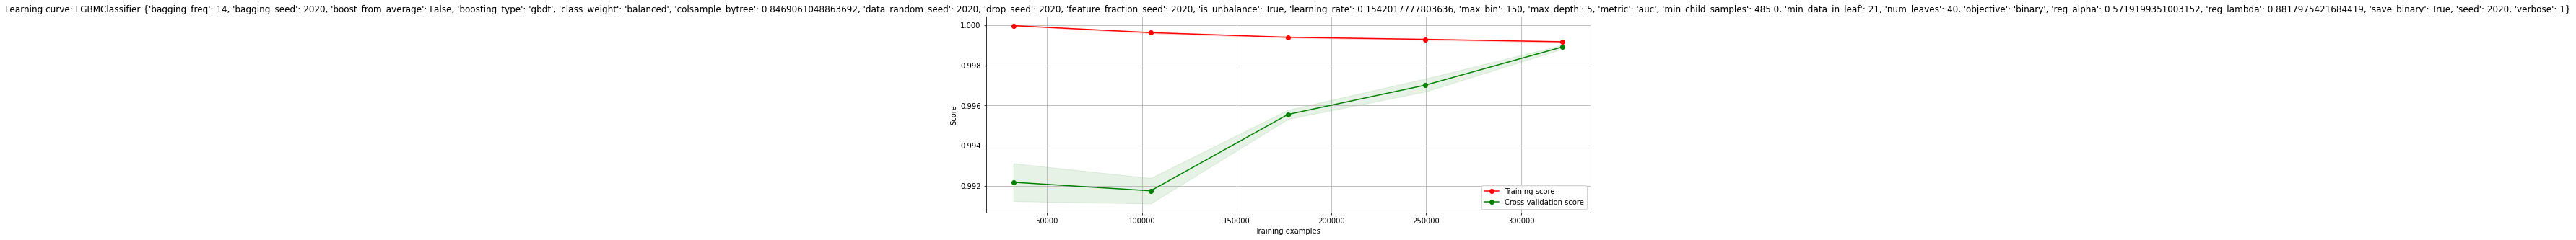

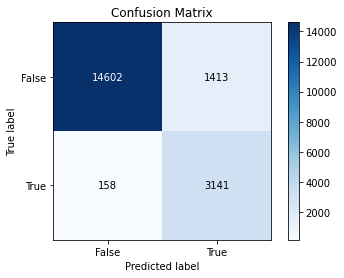

In [221]:
feats_eli = ['cnt_customer_cancel_log','quantity_sum_log','cnt_customer_cancel_perc','price_total_sum_log','price_unit_sum_log','cnt_product_new_cancel_perc','price_total_min_log','cnt_product_new_stock_cancel_perc','invoice_date_min','customer_id','invoice_date_h','cnt_product_new_cancel_log','cnt_customer_not_cancel_log','price_unit_min_log',]

best = {
    'model': {
        'bagging_freq': 14, 'bagging_seed': 2020, 'boost_from_average': False, 'boosting_type': 'gbdt', 'class_weight': 'balanced', 'colsample_bytree': 0.8469061048863692, 'data_random_seed': 2020, 'drop_seed': 2020, 'feature_fraction_seed': 2020, 'is_unbalance': True, 'learning_rate': 0.1542017777803636, 'max_bin': 150, 'max_depth': 5, 'metric': 'auc', 'min_child_samples': 485.0, 'min_data_in_leaf': 21, 'num_leaves': 40, 'objective': 'binary', 'reg_alpha': 0.5719199351003152, 'reg_lambda': 0.8817975421684419, 'save_binary': True, 'seed': 2020, 'verbose': 1
    },
    'threshold': 0.1}

### run

score, e = run_cv(train, lgb.LGBMClassifier, best['model'], feats_eli, submit_set=test_submission, n_splits=3, test_size=0.25, threshold=best['threshold'], agg_func=np.mean, is_plot_learning_curve=True, is_plot_confusion_matrix=True)

In [222]:
custom_error(e)

0.2675255881161034

In [223]:
# SUBMISSION LGBM: ELI + HYPEROPT
feats_eli = ['cnt_customer_cancel_log','quantity_sum_log','cnt_customer_cancel_perc','price_total_sum_log','price_unit_sum_log','cnt_product_new_cancel_perc','price_total_min_log','cnt_product_new_stock_cancel_perc','invoice_date_min','customer_id','invoice_date_h','cnt_product_new_cancel_log','cnt_customer_not_cancel_log','price_unit_min_log',]

best = {
    'model': {
'bagging_freq': 14, 'bagging_seed': 2020, 'boost_from_average': False, 'boosting_type': 'gbdt', 'class_weight': 'balanced', 'colsample_bytree': 0.8469061048863692, 'data_random_seed': 2020, 'drop_seed': 2020, 'feature_fraction_seed': 2020, 'is_unbalance': True, 'learning_rate': 0.1542017777803636, 'max_bin': 150, 'max_depth': 5, 'metric': 'auc', 'min_child_samples': 485.0, 'min_data_in_leaf': 21, 'num_leaves': 40, 'objective': 'binary', 'reg_alpha': 0.5719199351003152, 'reg_lambda': 0.8817975421684419, 'save_binary': True, 'seed': 2020, 'verbose': 1
    },
    'threshold': 0.1}

score, e = run_cv(train, lgb.LGBMClassifier, best['model'], feats_eli, submit_set=test, n_splits=3, test_size=0.25, threshold=best['threshold'], agg_func=np.mean, is_plot_learning_curve=False, is_plot_confusion_matrix=False)
e.head()

FEATURES:

 ['cnt_customer_cancel_log', 'quantity_sum_log', 'cnt_customer_cancel_perc', 'price_total_sum_log', 'price_unit_sum_log', 'cnt_product_new_cancel_perc', 'price_total_min_log', 'cnt_product_new_stock_cancel_perc', 'invoice_date_min', 'customer_id', 'invoice_date_h', 'cnt_product_new_cancel_log', 'cnt_customer_not_cancel_log', 'price_unit_min_log'] 

CUSTOM CV

calc_custom_error summary:
target distribution
Distribution:
orders: [82.91912602 17.08087398]
target_pred distribution
Distribution:
orders: [76.54551103 23.45448897]
MSE vs MSE REF 79663.94036639182 vs 49333.40341059088 (1.614807308211977)
mse:  1.614807308211977


,invoice,price_total,is_canceled_pred,total_return_pred
0,0,63.159180,False,0.000000
1,1,36.457031,True,36.457031
2,6,25.203125,True,25.203125
3,7,86.078613,False,0.000000
4,11,16.234067,False,0.000000


In [224]:
update_submit_set(e, 'submission_new_lgbm_eli_hyperopt.csv')

,invoice,total_return
0,0,0.000000
1,1,36.457031
2,6,25.203125
3,7,0.000000
4,11,0.000000
...,...,...
2597,53427,0.000000
2598,53430,0.000000
2599,53433,0.000000
2600,53447,0.000000
